In [31]:
import pandas as pd

# Cargamos los datos
datos = pd.read_csv("./../Datasets/alturas.txt", delimiter="\t")

datos = datos.apply(lambda x: x * 2.54)

# En este caso vamos a coger datos desbalanceados para que no siga una distribución normal


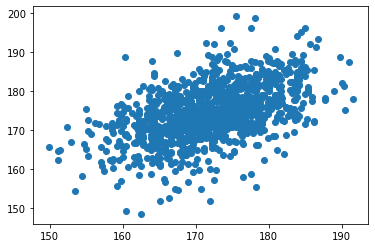

In [32]:
# Mostramos el gráfico para ver como están relacionados los datos
import matplotlib.pyplot as plt

plt.scatter(datos.Father, datos.Son)

(array([[  7.,  23.,  90., 239., 290., 258., 130.,  35.,   6.,   0.],
        [  5.,  14.,  52., 141., 297., 297., 176.,  76.,  14.,   6.]]),
 array([148.59  , 153.6446, 158.6992, 163.7538, 168.8084, 173.863 ,
        178.9176, 183.9722, 189.0268, 194.0814, 199.136 ]),
 <a list of 2 BarContainer objects>)

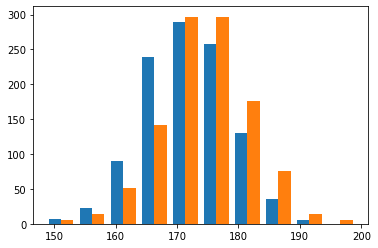

In [41]:
# Análisis de la normalidad básico
plt.hist(datos)

In [33]:
# Mostramos el índice de correlación de ambas columnas
datos.corr()

,Father,Son
Father,1.000000,0.501163
Son,0.501163,1.000000


In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
X = pd.DataFrame(datos['Father'])
Y = pd.DataFrame(datos['Son'])


# Separamos nuestros datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
 
# Creamos el modelo de Regresión Lineal
modelo = LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que es en definitiva una línea (en este caso, al ser 2D)
y_pred_train = regr.predict(X_train)
 
# OJO!!!!! Estos datos son sólo del conjunto de entrenamiento
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Término independiente (corte de la recta en eje Y): \n', regr.intercept_)
# Error Cuadrado Medio
ECM_train = mean_squared_error(y_train, y_pred_train)
print("Error cuadrático medio: %.2f" % ECM_train)
# Puntaje de Varianza. El mejor puntaje es un 1.0
R2_train = r2_score(y_train, y_pred_train)
print('R²: %.2f' % R2_train)

    Father
0  165.100
1  160.782
2  165.100
3  167.132
4  155.194
5  160.020
6  166.116
7  164.338
8  167.894
9  170.180
Coeficientes: 
 [[0.53215243]]
Término independiente (corte de la recta en eje Y): 
 [83.0412526]
Error cuadrático medio: 39.09
R²: 0.27


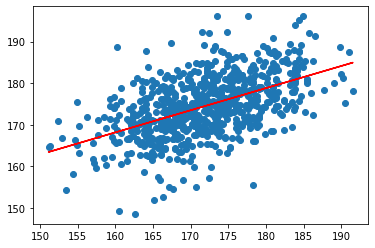

In [39]:
# Mostramos el gráfico de nuestro entrenamiento con la recta

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train, color="red")
plt.show()

In [40]:
# Vamos a ver si nuestro modelo generaliza bien comparando los datos de predicción con nuestro conjunto de test para ver si generaliza bien
y_pred_test = regr.predict(X_test)

# Error Cuadrado Medio
ECM_test = mean_squared_error(y_test, y_pred_test)
print("Error cuadrático medio entrenamiento: %.2f" % ECM_train)
print("Error cuadrático medio test: %.2f" % ECM_test)
# Puntaje de Varianza. El mejor puntaje es un 1.0
R2_test = r2_score(y_test, y_pred_test)
print('R² entrenamiento: %.2f' % R2_train)
print('R² test: %.2f' % R2_test)

Error cuadrático medio entrenamiento: 39.09
Error cuadrático medio test: 36.71
R² entrenamiento: 0.27
R² test: 0.20
